In [1]:
from comibis.utils import *
from comibis.polar import *

# Import data

4435 scw found
['150-200' '200-210' '210-250' '250-300' '300-350' '350-400' '400-450'
 '450-500' '500-600' '600-800' '800-1000']


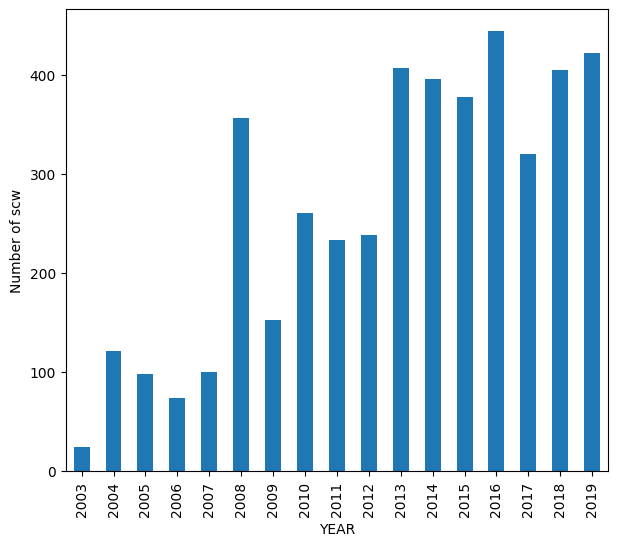

In [2]:
src='crab_lowe'
scw_file_name_list=['auto_pre2020'] # several df can be combined (energy/pola bins need to match)
plot_scw=1 # to plot the distribution of the over time/revs
resp_dir='compton_responses'
saved_pola_folder = 'saved_pola_df'
spicorr_file = 'spicorr_2YEAR_5deg.csv' 

if plot_scw: fig, ax= plt.subplots(1,1,figsize=(7,6))
# df_pola_scw, band_names, n_pola_bands = charge_df(src, scw_file_name_list, plot=plot_scw, n_pola_bands=None)
df_pola_scw, band_names = charge_df(src, scw_file_name_list,saved_pola_folder, resp_dir, spicorr_file, plot_scw)

# Show polarization parameters (PA, PF) as a function of energy 
some further selection on off-axis angle, date, revolution number, etc... can be done

In [3]:
angle_max=5.
spicorr='auto'
# date_type, start_date, end_date= 'ISOT', '2018-01-01','2023-01-01' # ex using ISOT
# date_type, start_date, end_date= 'MJD', 58500, 65000 # ex using MJD
date_type, start_date, end_date= None, None, None
p_uplim=0.01 # eq to sigma=2.5
SNR_threshold = 12.
pa_mod= 'PA_ref90'
plot_scale='lin' # 'log'
# energy_bands = 'all' # default=all energy bands
energy_bands=['210-250','250-300','300-400']

df_pola_scw_sel = scw_selection(df_pola_scw, angle_max=angle_max, rev_list=None, start_date=start_date, end_date=end_date, date_type=date_type)
print('{0} scw selected (avg off-axis angle = {1:.1f}°)'.format(len(df_pola_scw_sel.SCW.unique()),df_pola_scw_sel.ANGLE.mean()))
all_polarigrams = Polarigram(df_pola_scw_sel, band_names, angle_max)
all_polarigrams.import_prf(pulsefrac_dir='compton_responses', pulsefrac_file='comps-prf-1.txt')
all_polarigrams.make_polar(spicorr)
all_polarigrams.pola_espectrum(energy_bands, pa_mod, SNR_threshold, p_uplim, verbose=1)
all_polarigrams.plot_polar_espectrum(plot_scale, plot_percent=True)

3176 scw selected (avg off-axis angle = 3.3°)
